# Setup

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

# Creating Dataset

In [3]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

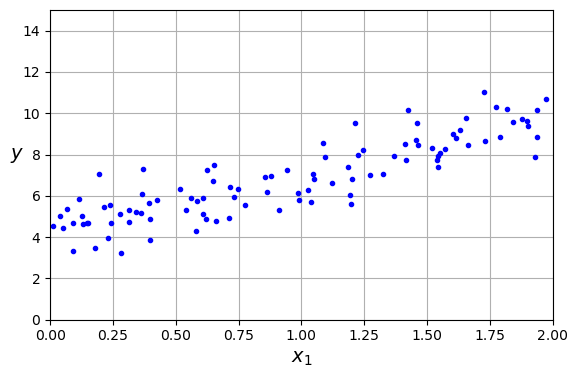

In [4]:
# extra code – generates and saves data

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

# Linear Regression using Sklearn

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [6]:
theta_0 = lin_reg.intercept_
theta_1 = lin_reg.coef_
theta_1*[1, 2]

array([[2.77011339, 5.54022677]])

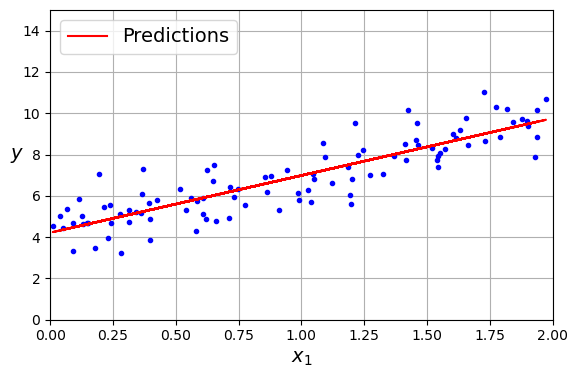

In [7]:
plt.figure(figsize=(6, 4))
y_pred = theta_0 + theta_1*X
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")
plt.show()

# Learning Curve

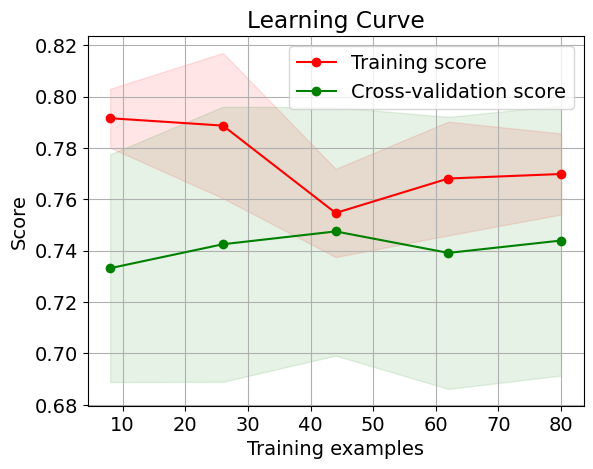

In [8]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lin_reg, X, y)
plt.show()

# Coefficient of the determination of the prediction - $R^2$ score

In [9]:
lin_reg.score(X, y_pred)

1.0

# Polynomial Regression

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

# Regularized Linear Model

# Ridge Regression

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=2000, solver="cholesky")
ridge_reg.fit(X, y)

In [ ]:
y_pred = ridge_reg.predict(X)

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", label="Ridge Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("ridge_linear_model_predictions_plot")
plt.show()

# Ridge Regression and $\alpha$

In [ ]:
def RidgePlot(alpha, X, y):
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(X, y)
    y_pred = ridge_reg.predict(X)
    plt.plot(X, y, "b.")
    plt.plot(X, y_pred, "r-", label= "alpha = " + str(alpha))
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.legend(loc="upper left")
    #plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
plt.subplot(221)
RidgePlot(0, X, y)
#plt.ylabel("$y$  ", rotation=0)
plt.subplot(222)
RidgePlot(0.1, X, y)
plt.subplot(223)
RidgePlot(10, X, y)
plt.subplot(224)
RidgePlot(100, X, y)
save_fig('Ridge Regression Comparison')
plt.show()


# Lasso Regression

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

In [ ]:
def LassoPlot(alpha, X, y):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X, y)
    y_pred = lasso_reg.predict(X)
    plt.plot(X, y, "b.")
    plt.plot(X, y_pred, "r-", label= "alpha = " + str(alpha))
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.legend(loc="upper left")
    #plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
plt.subplot(221)
LassoPlot(0.01, X, y)
#plt.ylabel("$y$  ", rotation=0)
plt.subplot(222)
LassoPlot(0.1, X, y)
plt.subplot(223)
LassoPlot(10, X, y)
plt.subplot(224)
LassoPlot(100, X, y)
save_fig('Lasso Regression Comparison')
plt.show()

# Elastic Net

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
def ElasticNetPlot(alpha, l1_ratio, X, y):
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_net.fit(X, y)
    y_pred = elastic_net.predict(X)
    plt.plot(X, y, "b.")
    plt.plot(X, y_pred, "r-", label= "alpha=" + str(alpha) +",l1_rat.=" + str(l1_ratio))
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.legend(loc="upper left")
    #plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
plt.subplot(221)
ElasticNetPlot(1, 0.1, X, y)
#plt.ylabel("$y$  ", rotation=0)
plt.subplot(222)
ElasticNetPlot(1, 0.5, X, y)
plt.subplot(223)
ElasticNetPlot(1, 0.7, X, y)
plt.subplot(224)
ElasticNetPlot(1, 1, X, y)
save_fig('Elastic Net Regression Comparison')
plt.show()